## 1) Delivery_time -> Predict delivery time using sorting time

In [2]:
# load the libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# load the dataset - Delivery_time
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### check correlation between numeric independent features


In [4]:
# correlation matrix
corel=df.corr().round(2)
corel

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


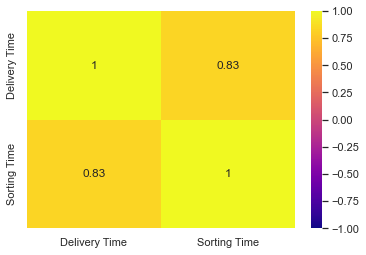

In [5]:
# heatmap
sns.heatmap(data=corel,
           annot=True,
           cmap='plasma',
           vmin=-1,
           vmax=1);

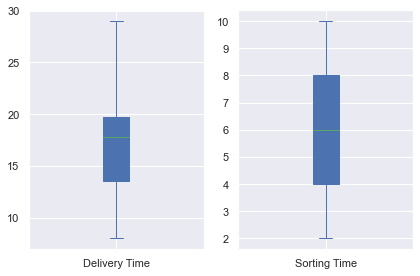

In [6]:
df.plot(kind='box',subplots=True,patch_artist=True)
plt.tight_layout();

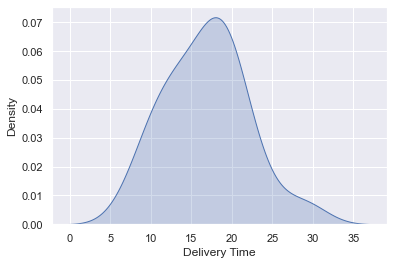

In [7]:
sns.kdeplot(data=df,x='Delivery Time',fill=True);

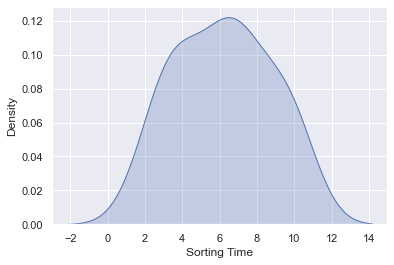

In [8]:
sns.kdeplot(data=df,x='Sorting Time',fill=True);

## Outlier Treatment 

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

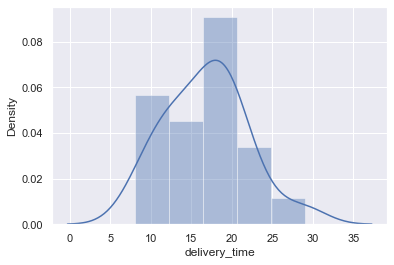

In [11]:
sns.distplot(df['delivery_time'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


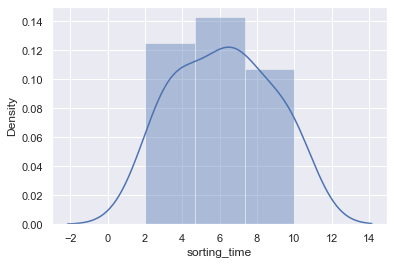

In [12]:
sns.distplot(df['sorting_time']);

In [13]:
q3=df['delivery_time'].quantile(0.75)
q1=df['delivery_time'].quantile(0.25)
q3,q1

(19.75, 13.5)

In [14]:
IQR=q3-q1
UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
UB,LB

(29.125, 4.125)

In [14]:
#df['Delivery Time']=np.where(df['Delivery Time']>UB,UB,df['Delivery Time'])
#df['Delivery Time']=np.where(df['Delivery Time ']<LB,LB,df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21e36170460>,
 'caps': [<matplotlib.lines.Line2D at 0x21e36170a00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21e361700a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e36170fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e3617b2b0>],
 'means': []}

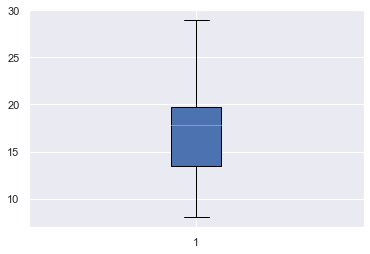

In [15]:
plt.boxplot(data=df,x='delivery_time',patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e361c94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e361c9a90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21e361c90d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e361d50a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e361d5370>],
 'means': []}

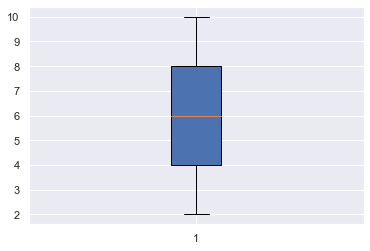

In [16]:
plt.boxplot(data=df,x='sorting_time',patch_artist=True)

## from above boxplot we conclude that there is no outlier

## Missing value check

In [17]:
df.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

### fit a simple linear regression model using statsmodels library using the formula api

In [18]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
x = df['sorting_time']
y = df['delivery_time']

## Scatter plot

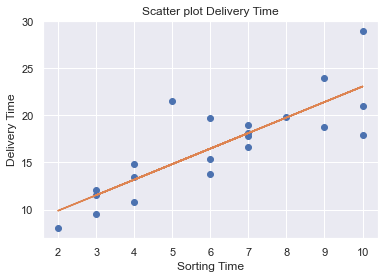

In [24]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

##### As displayed in the scatter plot , the data does contains some outliers,but there is positive correlation between delivery time and sorting time


## Regression Model

In [26]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## No Transformation

In [27]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    6.12e-15
Time:                        11:57:29   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of X

In [29]:
x_log = np.log(df['sorting_time'])

In [30]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    1.48e-17
Time:                        12:01:22   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of Y

In [32]:
y_log=np.log(df['delivery_time'])

In [33]:
model=sm.OLS(y_log,x).fit()
predictions=model.predict(x)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.00e-12
Time:                        12:02:48   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of x and y

In [36]:
model=sm.OLS(y_log,x_log).fit()
predictions=model.predict(x_log)

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.72e-17
Time:                        12:04:08   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQRT Transformation of X

In [38]:
x_sqrt=np.sqrt(df['sorting_time'])

In [39]:
model=sm.OLS(y,x_sqrt).fit()
predictions=model.predict(x_sqrt)

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    1.88e-17
Time:                        12:07:05   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQRT Transformation of Y

In [41]:
y_sqrt=np.sqrt(df['delivery_time'])

In [42]:
model=sm.OLS(y_sqrt,x).fit()
predictions=model.predict(x)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.09e-13
Time:                        12:09:18   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQRT Transformation of X and Y

In [45]:
model=sm.OLS(y_sqrt,x_sqrt).fit()
predictions=model.predict(x_sqrt)

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3686.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.71e-24
Time:                        12:11:41   Log-Likelihood:                         -4.5871
No. Observations:                  21   AIC:                                      11.17
Df Residuals:                      20   BIC:                                      12.22
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     2.0302      0.033     60.709      0.000       1.960       2.100
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.118
Skew:                           0.136   Prob(JB):                        0.943
Kurtosis:                       2.754   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT Transformation of X

In [47]:
x_cbrt=np.cbrt(df['sorting_time'])

In [48]:
model=sm.OLS(y,x_cbrt).fit()
predictions=model.predict(x_cbrt)

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              580.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.02e-16
Time:                        12:15:54   Log-Likelihood:                         -54.195
No. Observations:                  21   AIC:                                      110.4
Df Residuals:                      20   BIC:                                      111.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     9.4658      0.393     24.087      0.000       8.646      10.286
==============================================================================
Omnibus:                        7.278   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.902
Skew:                           1.097   Prob(JB):                       0.0862
Kurtosis:                       3.887   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT Transformation of Y

In [50]:
y_cbrt=np.cbrt(df['delivery_time'])

In [51]:
model=sm.OLS(y_cbrt,x).fit()
predictions=model.predict(x)

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              207.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.00e-12
Time:                        12:17:37   Log-Likelihood:                         -23.897
No. Observations:                  21   AIC:                                      49.79
Df Residuals:                      20   BIC:                                      50.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     0.3649      0.025     14.414      0.000       0.312       0.418
==============================================================================
Omnibus:                        2.597   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.300
Skew:                          -0.233   Prob(JB):                        0.522
Kurtosis:                       1.874   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT Transformation of X and Y

In [53]:
model=sm.OLS(y_cbrt,x_cbrt).fit()
predictions=model.predict(x_cbrt)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3370.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    9.01e-24
Time:                        12:18:20   Log-Likelihood:                          4.4569
No. Observations:                  21   AIC:                                     -6.914
Df Residuals:                      20   BIC:                                     -5.869
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     1.3972      0.024     58.056      0.000       1.347       1.447
==============================================================================
Omnibus:                        0.117   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.326
Skew:                          -0.101   Prob(JB):                        0.850
Kurtosis:                       2.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Output Interpretation

#### We will use (sqrt transformation of x and y) Model as it has the best R square value

    1 - p-value < 0.01
    Thus the model is accepted

    2 - coefficient == 2.0304
    Thus if the value of Sorting Time is increased by 1,     the predicted value of Delivery Time will increase       by 2.0304

    3 - Adj. R-sqared == 0.994
    Thus the model explains 99.4% of the variance in         dependent variable